In [3]:
import numpy as np
import random
import os

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [4]:
import pandas as pd

train = pd.read_csv('C:/Users/hjn/Desktop/소득예측/income-forcast/train.csv')
test = pd.read_csv('C:/Users/hjn/Desktop/소득예측/income-forcast/test.csv')

display(train.head(3))
display(test.head(3))

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860


,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Householder,Native,US,Unknown,Unknown,Single,0,0,0,Under Median
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Child 18 or older,Native,US,US,US,Nonfiler,0,0,0,Under Median
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Child 18 or older,Native,US,US,US,Single,0,0,0,Under Median


In [5]:
print(train.columns)

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')


In [6]:
train.isna().sum()

ID                        0
Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          0
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
Income                    0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst

<Axes: xlabel='Income', ylabel='Count'>

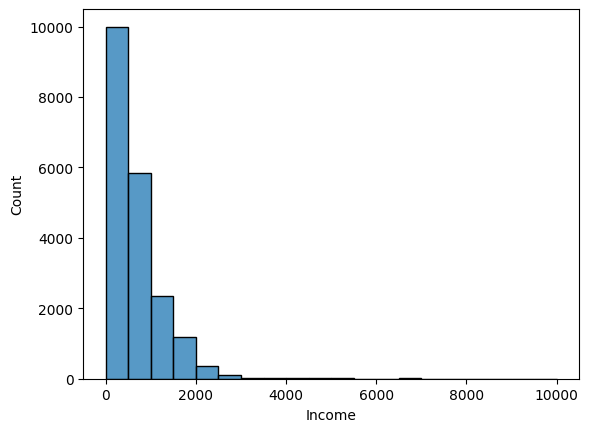

In [ ]:
sns.histplot(x= 'Income', data = train, bins = 20)

## income vs age

<Axes: xlabel='Age', ylabel='Income'>

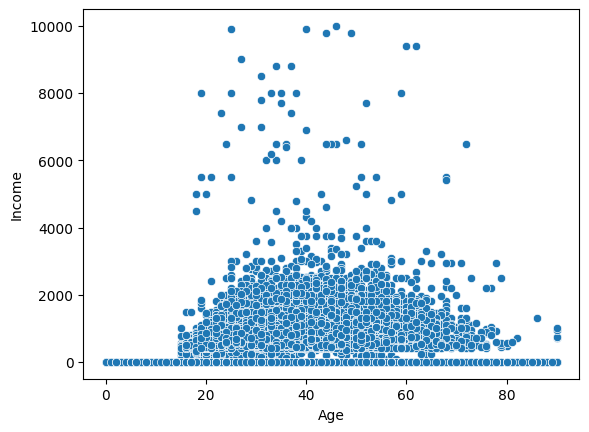

In [6]:
sns.scatterplot(x='Age', y='Income', data = train)

In [8]:
# 약한 상관관계가 있다.
spst.pearsonr(train['Age'], train['Income'])

PearsonRResult(statistic=0.12479478557328477, pvalue=3.108910269931984e-70)

## income vs gender

<Axes: xlabel='Gender', ylabel='Income'>

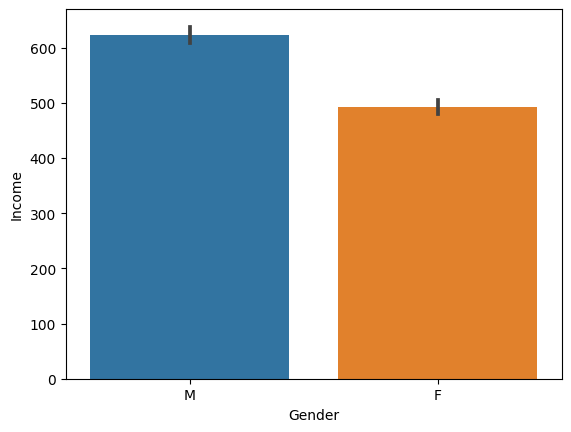

In [10]:
sns.barplot(x='Gender', y='Income', data = train)

In [16]:
# 두 그룹으로 데이터 저장
male = train.loc[train['Gender']=='M', 'Income']
female = train.loc[train['Gender']=='F', 'Income']

spst.ttest_ind(male, female)

TtestResult(statistic=13.336700631450782, pvalue=2.107161980488648e-40, df=19998.0)

In [ ]:
# 의미가 있음 -> label encoder로 한 열로 쓰기

## Education_Status vs income

<Axes: xlabel='Education_Status', ylabel='Income'>

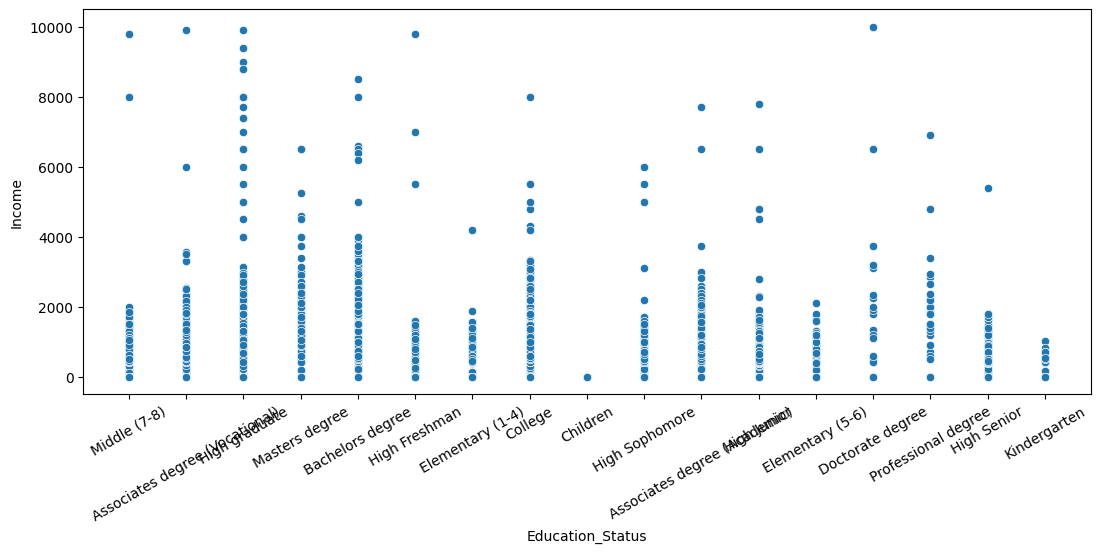

In [19]:
plt.figure(figsize=(13,5))
plt.xticks(rotation = 30)
sns.scatterplot(x='Education_Status', y='Income', data = train)

<Axes: xlabel='Education_Status', ylabel='Income'>

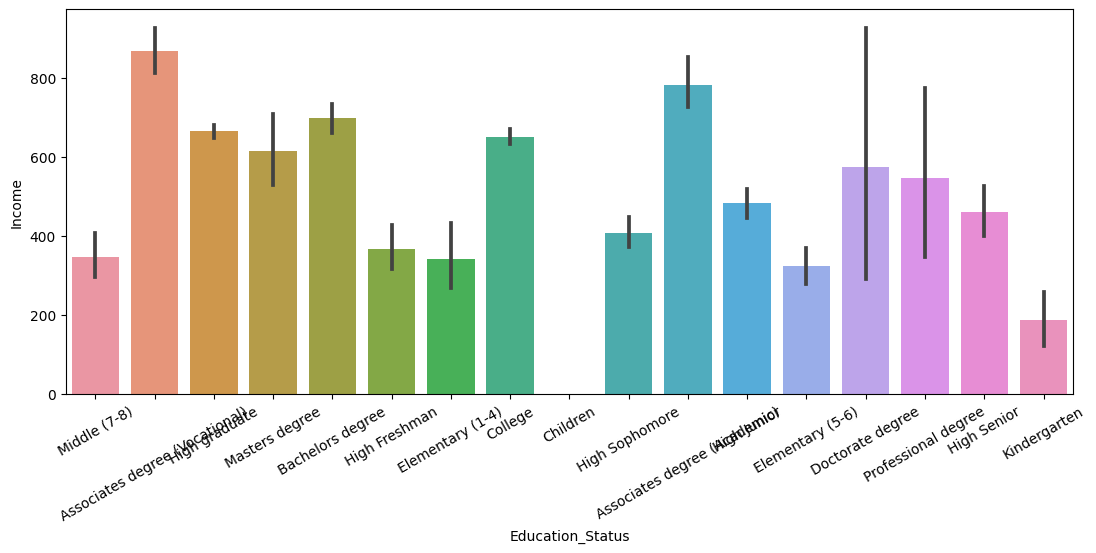

In [21]:
plt.figure(figsize=(13,5))
plt.xticks(rotation = 30)
sns.barplot(x='Education_Status', y='Income', data = train)

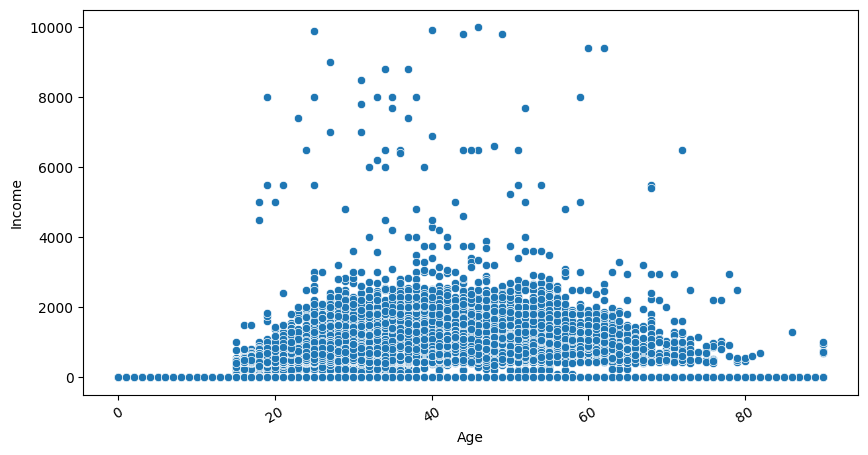

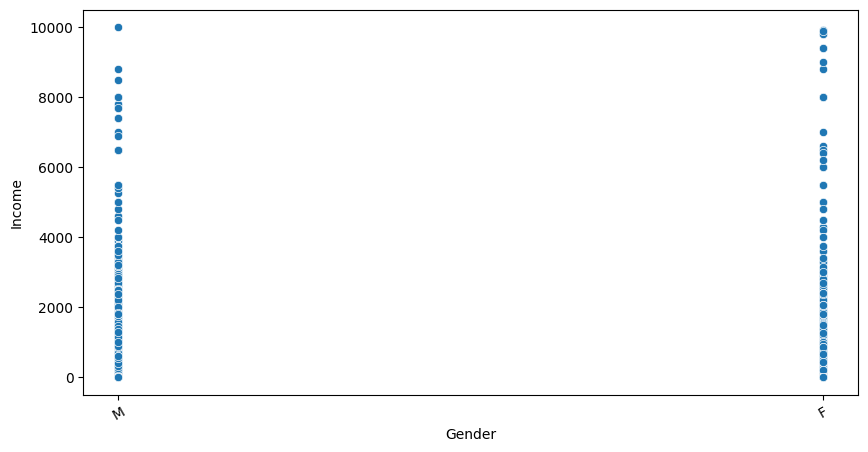

In [ ]:
for i in ['Age', 'Gender']:
  plt.figure(figsize=(10,5))
  plt.xticks(rotation = 30)
  sns.scatterplot(x=i, y='Income', data = train)

<Axes: xlabel='Household_Status', ylabel='Income'>

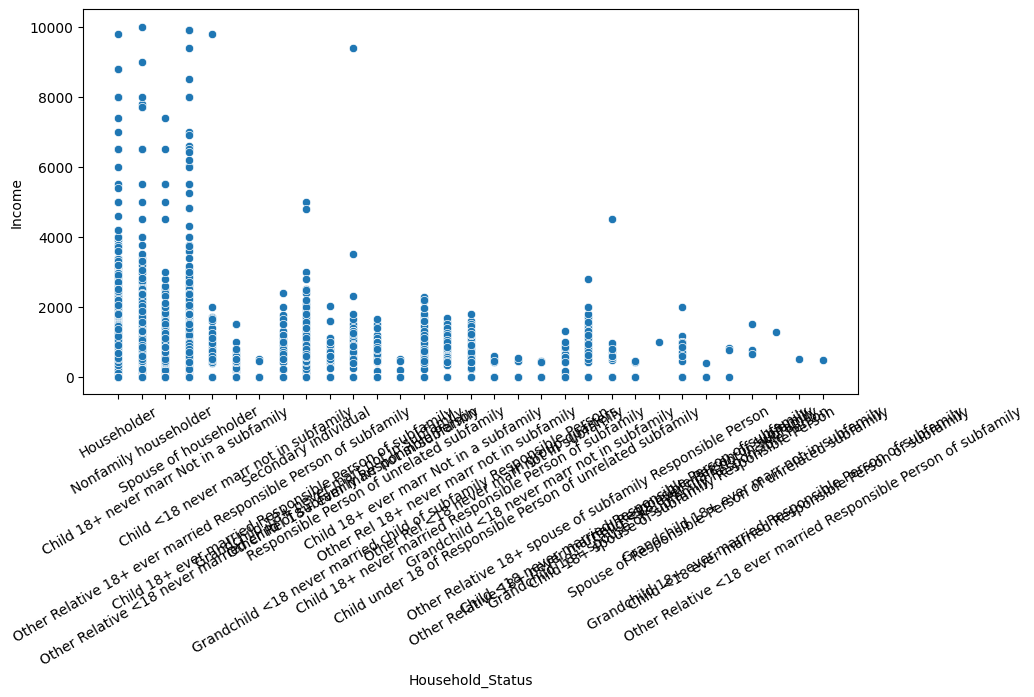

In [28]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 30)
sns.scatterplot(x='Household_Status', y='Income', data = train)

In [ ]:
trainage = train[train['Age']<=17]

In [8]:
train_x = train.drop(columns=['ID', 'Income'])
train_y = train['Income']

test_x = test.drop(columns=['ID'])

In [27]:
test_x.isna().sum()

Age                       0
Gender                    0
Education_Status          0
Employment_Status         0
Working_Week (Yearly)     0
Industry_Status           0
Occupation_Status         0
Race                      0
Hispanic_Origin           0
Martial_Status            0
Household_Status          1
Household_Summary         0
Citizenship               0
Birth_Country             0
Birth_Country (Father)    0
Birth_Country (Mother)    0
Tax_Status                0
Gains                     0
Losses                    0
Dividends                 0
Income_Status             0
dtype: int64

In [30]:
nan_rows = test_x[test_x.isna().any(axis=1)]
nan_rows

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
2659,20,F,College,Children or Armed Forces,0,Not in universe or children,Unknown,Black,All other,Single,...,Other relative of householder,Native,US,US,US,Nonfiler,0,0,0,Under Median


In [20]:
encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)
not_encoding_target = list(train_x.dtypes[train_x.dtypes != "object"].index)

In [19]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 범주형 변수 선택 (예: Gender, Education_Status, Employment_Status 등)
#encoding_target

# 범주형 변수들을 따로 추출
cat_data = train_x[encoding_target]

# OneHotEncoder 객체 생성
encoder = OneHotEncoder()

# 범주형 변수들을 OneHotEncoder를 사용하여 변환
encoded_data = encoder.fit_transform(cat_data)

# OneHotEncoder의 결과는 희소 행렬(Sparse Matrix)이므로 이를 밀집 행렬(Dense Matrix)로 변환
encoded_data_dense = encoded_data.toarray()

# 밀집 행렬을 데이터프레임으로 변환하여 인코딩된 데이터 확인
encoded_df = pd.DataFrame(encoded_data_dense, columns=encoder.get_feature_names_out(encoding_target))
print(encoded_df.shape)


(20000, 270)


In [26]:
# 범주형 변수들을 따로 추출
test_cat_data = test[encoding_target]

# 저장된 OneHotEncoder를 사용하여 변환
encoded_test_data = encoder.transform(test_cat_data)

# 밀집 행렬을 데이터프레임으로 변환하여 인코딩된 데이터 확인
encoded_test_df = pd.DataFrame(encoded_test_data.toarray(), columns=encoder.get_feature_names_out(encoding_target))


ValueError: Found unknown categories [nan] in column 8 during transform

In [23]:
not_encoded_df = train_x[not_encoding_target]

In [24]:
train2 = pd.concat([not_encoded_df, encoded_df], axis=1)


In [25]:
train2.shape

(20000, 275)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [29]:
x_train, x_val, y_train, y_val = train_test_split(train1, train_y, test_size=0.2)

In [43]:
import tensorflow as tf

# 모델을 준비합니다.
X = tf.keras.Input(shape=[275])
H = tf.keras.layers.Dense(128)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(64)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
H = tf.keras.layers.Dense(16)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)
Y = tf.keras.layers.Dense(1)(H)
model2 = tf.keras.Model(X, Y)
model2.compile(loss="mse") # 회귀 모델

In [44]:
model2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 275)]             0         
                                                                 
 dense_8 (Dense)             (None, 128)               35328     
                                                                 
 batch_normalization_6 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_7 (Bat  (None, 64)                256       
 chNormalization)                                          

In [45]:
early = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
result = model2.fit(train1, train_y, epochs=10000000, batch_size=32,
                   validation_split=0.2, # validation_data=(x_val, y_val)
                   callbacks=[early]
)

Epoch 1/10000000
500/500 [==============================] - 2s 3ms/step - loss: 805072.1250 - val_loss: 757540.5625
Epoch 2/10000000
500/500 [==============================] - 1s 2ms/step - loss: 795918.3125 - val_loss: 750029.4375
Epoch 3/10000000
500/500 [==============================] - 1s 2ms/step - loss: 782693.6875 - val_loss: 737529.1875
Epoch 4/10000000
500/500 [==============================] - 1s 2ms/step - loss: 765112.8750 - val_loss: 719080.1250
Epoch 5/10000000
500/500 [==============================] - 1s 2ms/step - loss: 744367.8750 - val_loss: 696842.1250
Epoch 6/10000000
500/500 [==============================] - 1s 2ms/step - loss: 720654.8125 - val_loss: 676933.7500
Epoch 7/10000000
500/500 [==============================] - 1s 2ms/step - loss: 693294.5000 - val_loss: 650833.5000
Epoch 8/10000000
500/500 [==============================] - 1s 2ms/step - loss: 664423.5000 - val_loss: 632564.2500
Epoch 9/10000000
500/500 [==============================] - 1s 2ms/step 

In [46]:
y_pred2 = model2.predict(x_val)

125/125 [==============================] - 0s 1ms/step


In [ ]:
#tf.keras.optimizers.RMSprop(learning_rate=0.001), loss='mse', metrics=['mse', 'mae']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoding_target = list(train_x.dtypes[train_x.dtypes == "object"].index)

for i in encoding_target:
    ohe = OneHotEncoder(sparse=False)
    print(i)
    # 'category' 열을 변환하여 원-핫 인코딩 적용
    encoded_data = ohe.fit_transform(train_x[[i]])

    # 새로운 데이터프레임 생성
    encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out([i]))
    # # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    # train_x[i] = train_x[i].astype(str)
    # test_x[i] = test_x[i].astype(str)

    # # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    # for case in np.unique(test_x[i]):
    #     if case not in le.classes_:
    #         le.classes_ = np.append(le.classes_, case)

    # test_x[i] = le.transform(test_x[i])

Gender
Education_Status
Employment_Status
Industry_Status
Occupation_Status
Race
Hispanic_Origin
Martial_Status
Household_Status
Household_Summary
Citizenship
Birth_Country
Birth_Country (Father)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Birth_Country (Mother)
Tax_Status
Income_Status


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
encoded_df

,Income_Status_Over Median,Income_Status_Under Median,Income_Status_Unknown
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
...,...,...,...
19995,0.0,1.0,0.0
19996,0.0,1.0,0.0
19997,0.0,0.0,1.0
19998,0.0,1.0,0.0


In [ ]:
test.shape

(10000, 22)

In [ ]:
train.shape

(20000, 23)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2)

In [ ]:
display(train_x.head(3))

,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,Martial_Status,...,Household_Summary,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status
0,63,1,15,2,4,20,11,4,0,1,...,4,2,39,39,39,4,0,0,0,2
1,37,1,1,2,52,6,11,4,0,4,...,4,2,39,39,39,5,0,0,0,1
2,58,0,12,2,52,11,0,1,0,1,...,4,2,39,39,39,2,3411,0,0,1


In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train_x, train_y)

RandomForestRegressor()

In [ ]:
y_pred1 = model1.predict(x_val)

In [ ]:
tensor = tf.convert_to_tensor(test_x, dtype=tf.float32)

ValueError: could not convert string to float: 'M'

In [ ]:
preds = model2.predict(tensor)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [47]:
rmse = mean_squared_error(y_val, y_pred2)**0.5
print(rmse)

591.5370864741507


In [ ]:
# 기본 랜덤포레스트
rmse1 = mean_squared_error(y_val, y_pred1)**0.5
print(rmse1)

597.0302019736413


In [ ]:
submission = pd.read_csv('./sample_submission (2).csv')
submission['Income'] = preds
submission

,ID,Income
0,TEST_0000,0.00
1,TEST_0001,0.00
2,TEST_0002,487.40
3,TEST_0003,595.92
4,TEST_0004,0.00
...,...,...
9995,TEST_9995,1015.25
9996,TEST_9996,834.72
9997,TEST_9997,407.95
9998,TEST_9998,0.00


In [ ]:
submission.to_csv('baseline_submission1.csv', index=False)